# Salaries Dataset

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection and Processing

In [2]:
#Loading the data from csv file to pandas dataframe
df=pd.read_csv("Salaries.csv")

In [3]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
#Inspecting the first 5 rows of the DataFrame
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [5]:
#Checking the number of rows and columns
df.shape

(397, 6)

In [6]:
#Getting some information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [7]:
# Checking the number of missing values 
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [8]:
# Checking the distribution of categorical data

print(df.discipline.value_counts())
print(df.sex.value_counts())

B    216
A    181
Name: discipline, dtype: int64
Male      358
Female     39
Name: sex, dtype: int64


In [9]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

# Encoding the Categorical data

In [10]:
# Encoding the columns

df.replace({'discipline':{'B':0,'A':1}}, inplace=True)

df.replace({'sex':{'Male':0, 'Female':1}}, inplace=True)

In [11]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,0,19,18,0,139750
1,Prof,0,20,16,0,173200
2,AsstProf,0,4,3,0,79750
3,Prof,0,45,39,0,115000
4,Prof,0,40,41,0,141500


In [12]:
df.describe()

,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000
mean,0.455919,22.314861,17.614610,0.098237,113706.458438
std,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,0.000000,12.000000,7.000000,0.000000,91000.000000
50%,0.000000,21.000000,16.000000,0.000000,107300.000000
75%,1.000000,32.000000,27.000000,0.000000,134185.000000
max,1.000000,56.000000,60.000000,1.000000,231545.000000


In [13]:
df.keys()

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

# Splitting the data into Training and Testing Data

In [14]:
x=df.drop(['rank','salary'],axis=1)
y=df['salary']

In [150]:
print(x)

[[-0.91540317 -0.16599264  0.21534448 -0.3300584 ]
 [-0.91540317 -0.08844723  0.06703275 -0.3300584 ]
 [-0.91540317 -1.57476209 -1.26587219 -0.3300584 ]
 ...
 [ 1.09241483  1.43737821  0.68314877 -0.3300584 ]
 [ 1.09241483  0.28657314 -0.0101666  -0.3300584 ]
 [ 1.09241483 -1.12510777 -1.11445781 -0.3300584 ]]


In [151]:
print(y)

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    int64 
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    int64 
 5   salary         397 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 18.7+ KB


In [153]:
df.skew()

discipline       0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex              2.709958
salary           0.714568
dtype: float64

# Correlation

In [218]:
df_corr=df.corr().abs()

In [219]:
df_corr

,discipline,yrs.since.phd,yrs.service,sex,salary
discipline,1.000000,0.218087,0.164599,0.003724,0.156084
yrs.since.phd,0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.156084,0.419231,0.334745,0.138610,1.000000


# Correlation using heatmap

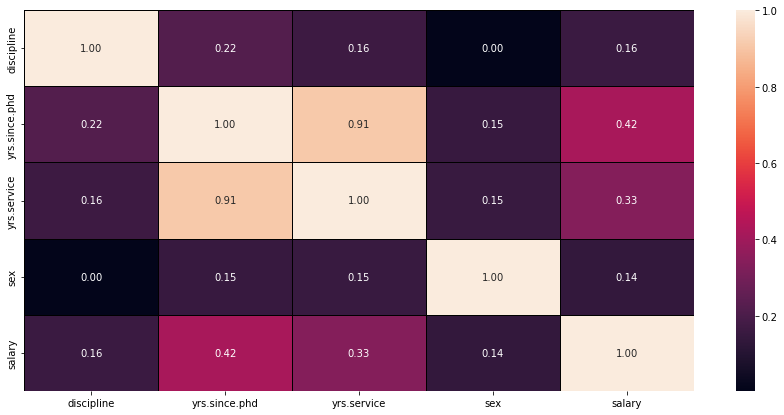

In [220]:
plt.figure(figsize=(15,7))
sns.heatmap(df_corr, annot=True, linewidths=0.5, linecolor="black", fmt='.2f')
plt.show()

In [221]:
x=df[['discipline','yrs.since.phd','yrs.service','sex']]
y=df[['salary']]

In [222]:
print(x)
print(y)

     discipline  yrs.since.phd  yrs.service  sex
0             0             19           18    0
1             0             20           16    0
2             0              4            3    0
3             0             45           39    0
4             0             40           41    0
..          ...            ...          ...  ...
392           1             33           30    0
393           1             31           19    0
394           1             42           25    0
395           1             25           15    0
396           1              8            4    0

[397 rows x 4 columns]
     salary
0    139750
1    173200
2     79750
3    115000
4    141500
..      ...
392  103106
393  150564
394  101738
395   95329
396   81035

[397 rows x 1 columns]


In [223]:
df.describe

<bound method NDFrame.describe of          rank  discipline  yrs.since.phd  yrs.service  sex  salary
0        Prof           0             19           18    0  139750
1        Prof           0             20           16    0  173200
2    AsstProf           0              4            3    0   79750
3        Prof           0             45           39    0  115000
4        Prof           0             40           41    0  141500
..        ...         ...            ...          ...  ...     ...
392      Prof           1             33           30    0  103106
393      Prof           1             31           19    0  150564
394      Prof           1             42           25    0  101738
395      Prof           1             25           15    0   95329
396  AsstProf           1              8            4    0   81035

[397 rows x 6 columns]>

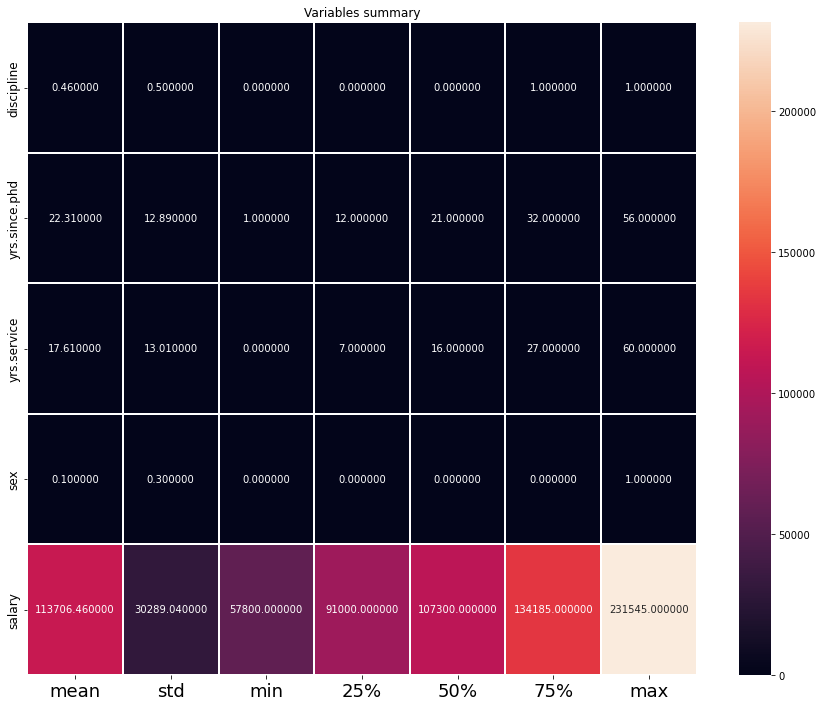

In [224]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth=2, annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.savefig('heatmap.png')
plt.show()

In [230]:
df.skew()

discipline       0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex              2.709958
salary           0.714568
dtype: float64

Normal Distribution Curve

<AxesSubplot:xlabel='discipline', ylabel='Density'>

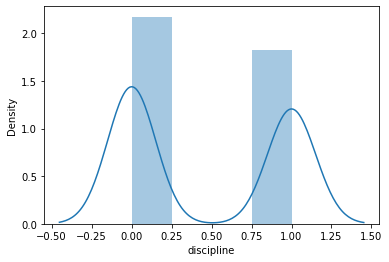

In [231]:
sns.distplot(df['discipline'])

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

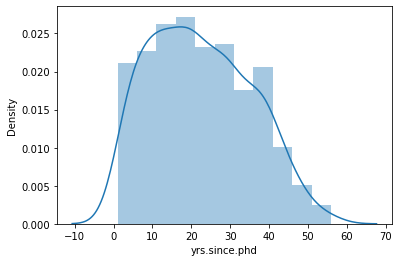

In [232]:
sns.distplot(df['yrs.since.phd'])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

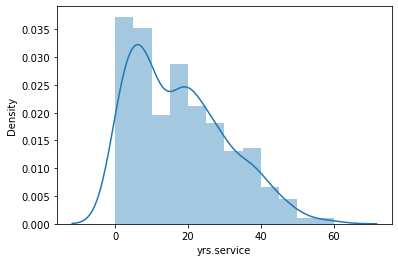

In [233]:
sns.distplot(df['yrs.service'])

<AxesSubplot:xlabel='sex', ylabel='Density'>

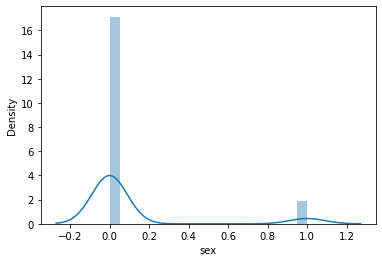

In [234]:
sns.distplot(df['sex'])

# Data Cleaning

In [235]:
df.corr()['salary']

discipline      -0.156084
yrs.since.phd    0.419231
yrs.service      0.334745
sex             -0.138610
salary           1.000000
Name: salary, dtype: float64

In [246]:
from sklearn.preprocessing import power_transform

In [247]:
x=power_transform(x,method='yeo-johnson')

array([[-0.91540317, -0.12729454,  0.25061906, -0.3300584 ],
       [-0.91540317, -0.04917821,  0.10511199, -0.3300584 ],
       [-0.91540317, -1.62812069, -1.28803213, -0.3300584 ],
       ...,
       [ 1.09241483,  1.39552477,  0.69878852, -0.3300584 ],
       [ 1.09241483,  0.32017198,  0.02856739, -0.3300584 ],
       [ 1.09241483, -1.13497737, -1.12348349, -0.3300584 ]])

In [248]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.91540317, -0.12729454,  0.25061906, -0.3300584 ],
       [-0.91540317, -0.04917821,  0.10511199, -0.3300584 ],
       [-0.91540317, -1.62812069, -1.28803213, -0.3300584 ],
       ...,
       [ 1.09241483,  1.39552477,  0.69878852, -0.3300584 ],
       [ 1.09241483,  0.32017198,  0.02856739, -0.3300584 ],
       [ 1.09241483, -1.13497737, -1.12348349, -0.3300584 ]])

# Since the outcome has continuous values we will use Linear Regression Model

In [249]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [250]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [251]:
x_train.shape

(265, 4)

In [252]:
y_train.shape

(265, 1)

In [253]:
x_test.shape

(132, 4)

In [254]:
y_test.shape

(132, 1)

In [255]:
lm=LinearRegression()

In [256]:
lm.fit(x_train,y_train)

LinearRegression()

In [257]:
lm.coef_

array([[-9280.01116551, 18560.6025362 , -2037.65581856, -2377.97510394]])

In [258]:
lm.intercept_

array([113657.72053473])

In [259]:
lm.score(x_train,y_train)

0.3346864937160474

In [260]:
#predict the value

pred=lm.predict(x_test)
print("Predicted result price:",pred)
print("actual price:",y_test)

Predicted result price: [[ 86931.76890006]
 [108413.15082025]
 [ 74877.54464097]
 [105113.40696898]
 [133322.82392257]
 [105361.11038679]
 [138707.74526047]
 [ 87589.70450229]
 [102248.9305708 ]
 [106210.6494608 ]
 [110594.17381109]
 [123259.59387992]
 [131549.69626987]
 [120594.82705418]
 [118063.79146462]
 [103114.84041011]
 [145031.71621338]
 [ 77874.09091889]
 [135491.80012448]
 [ 95007.91447682]
 [112039.19175346]
 [112917.12279403]
 [140681.14911187]
 [120064.20400475]
 [101285.74230836]
 [ 94814.2069328 ]
 [ 93476.25060219]
 [ 95732.35817952]
 [114978.80043679]
 [ 99579.55985322]
 [109080.85449154]
 [111928.7349803 ]
 [139933.67287169]
 [125287.56237824]
 [129530.73121318]
 [133106.59752642]
 [129934.90132375]
 [121235.42345716]
 [115818.11891584]
 [139853.13408694]
 [106056.71984276]
 [114690.25044674]
 [114807.22544934]
 [ 96839.78129841]
 [132721.48423125]
 [120205.67684342]
 [122656.78987084]
 [144918.60260708]
 [149597.82736974]
 [124051.45746261]
 [104302.88308329]
 [10489

In [261]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [262]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 18808.78505528054
Mean squared error: 671224651.1371287
Root mean squared error: 25908.00361157009


In [263]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.16403833279647617


# Regularization

In [264]:
from sklearn.linear_model import Lasso,Ridge

In [265]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.3346864937160472

In [266]:
ls.coef_

array([-9280.0109984 , 18560.60135701, -2037.65465173, -2377.97497411])

In [267]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.33468649371564796

In [268]:
rd.coef_

array([[-9280.00457829, 18560.55533008, -2037.6127689 , -2377.97412378]])

In [269]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enr.score(x_train,y_train)

0.3346864867113539

In [270]:
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.3346864867113539


array([-9279.13849687, 18554.35052445, -2031.9544984 , -2377.84519974])

In [272]:
from sklearn.svm import SVR

svr=SVR(kernel = "linear")
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
pred_y=svr.predict(x_test)


svr=SVR(kernel = "poly")
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
pred_y=svr.predict(x_test)



svr=SVR(kernel = "rbf")
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
pred_y=svr.predict(x_test)

-0.027183720301279246
-0.031590653053245266
-0.03330027661463797


In [273]:
from sklearn.svm import SVR


kernellist=['linear','poly','rbf']

for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

-0.027183720301279246
-0.031590653053245266
-0.03330027661463797


# Model Saving:

In [295]:
import pickle
filename='salaries.pkl'
pickle.dump(lm, open(filename, 'wb'))